# <font color='black'>Investment Portfolio</font>

In [1]:
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

Python version in this Jupyter Notebook: 3.11.5


### PACKAGES INSTALLATION

In [2]:
# Imports 
import numpy as np
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt
import warnings 
import riskfolio as rp 
from fpdf import FPDF
warnings.filterwarnings('ignore')

In [3]:
# Data of investiments 
inicio = '2021-01-01'
fim = '2024-03-15'

# Assets 
tickers = ['BTC-USD', 'ETH-USD','LINK-USD', 'MATIC-USD']

# Percentual de cada ativo
pesos = np.array([0.40,0.30,0.10,0.10])

In [4]:
carteira = yf.download(tickers, start=inicio, end=fim)['Adj Close']
carteira.tail()

[*********************100%%**********************]  4 of 4 completed


Ticker,BTC-USD,ETH-USD,LINK-USD,MATIC-USD
Date,,,,
2024-03-10,69019.789062,3881.193115,21.754612,1.230849
2024-03-11,72123.906250,4066.445068,21.289614,1.243770
2024-03-12,71481.289062,3980.273193,20.666775,1.181701
2024-03-13,73083.500000,4006.457031,20.768188,1.271405
2024-03-14,71396.593750,3883.140381,20.906294,1.221894


In [5]:
# ROI 
retorno_carteira = carteira.pct_change().dropna()

# Covariance
cov_in = retorno_carteira.cov()

# Pesos da carteira
pesos = pd.DataFrame(data={'pesos':pesos},index=tickers)
pesos

,pesos
BTC-USD,0.4
ETH-USD,0.3
LINK-USD,0.1
MATIC-USD,0.1


In [6]:
out_inicio = '2021-01-01'
out_fim = '2024-03-15'

#Download dos dados
carteira_out = yf.download(tickers, start = out_inicio, end = out_fim)['Adj Close']

#Calculo Retorno
retorno_out = carteira_out.pct_change().dropna()

#Matriz covariancia out-of-sample
cov_out = retorno_out.cov()

display(retorno_out.head())

[*********************100%%**********************]  4 of 4 completed


Ticker,BTC-USD,ETH-USD,LINK-USD,MATIC-USD
Date,,,,
2021-01-02,0.093726,0.060473,0.029276,0.069111
2021-01-03,0.020380,0.259475,0.117023,0.048942
2021-01-04,-0.024712,0.066350,-0.005795,0.232240
2021-01-05,0.063197,0.057461,0.071388,-0.005972
2021-01-06,0.083311,0.097369,0.179877,0.436016


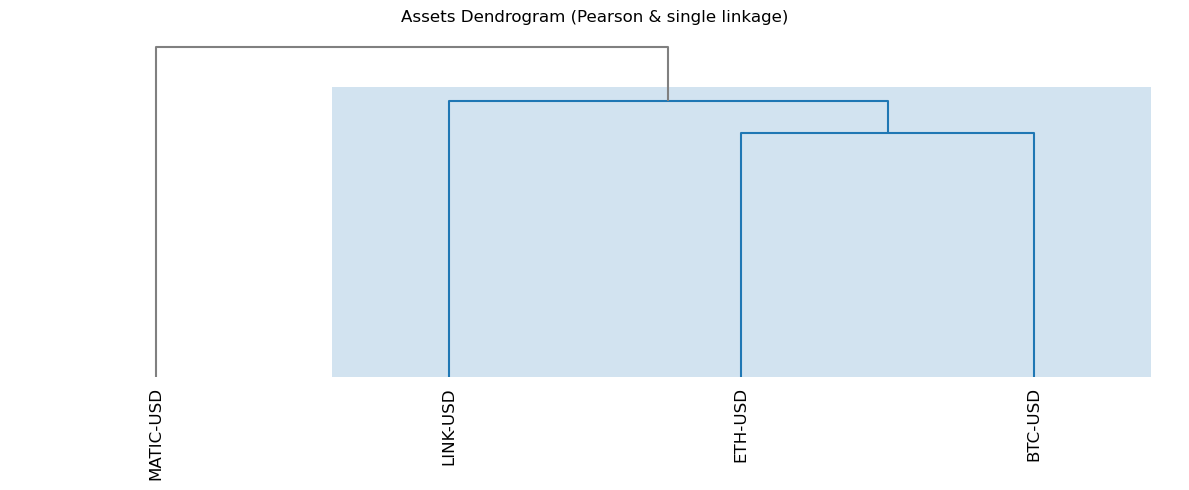

In [7]:
# Analise de Pearson dos ativos
ax = rp.plot_dendrogram(returns=retorno_carteira,
                      codependence='pearson',
                      linkage='single',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      ax=None)

In [8]:
# optimization model
pd.options.display.float_format = '{:.4%}'.format

portfolio = rp.HCPortfolio(returns=retorno_carteira)

model='HRP' 
codependence = 'pearson'
rm = 'MV' 
rf = 0 # 
linkage = 'single' 

leaf_order = True 

pesos_out = portfolio.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      leaf_order=leaf_order)
display(pesos_out)

,weights
BTC-USD,44.6353%
ETH-USD,26.8342%
LINK-USD,18.0840%
MATIC-USD,10.4465%


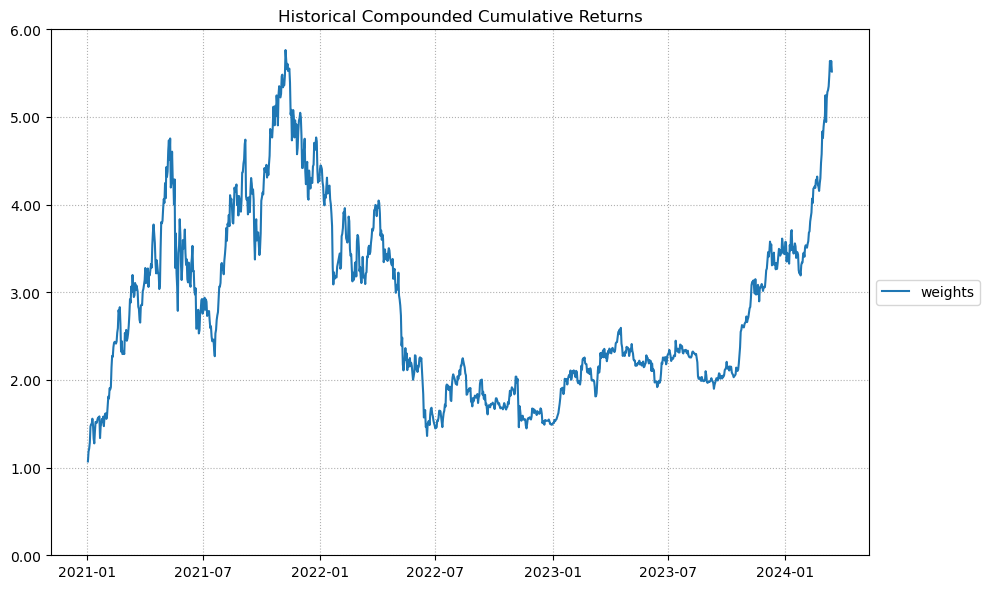

In [9]:
# Retorno out of sample
fig_2, ax_2 = plt.subplots(figsize=(1,1))

rp.plot_series(returns=retorno_out, w=pesos_out, cmap='tab20', height=6, width=10,
                    ax=None)
plt.savefig('cum_ret.png');

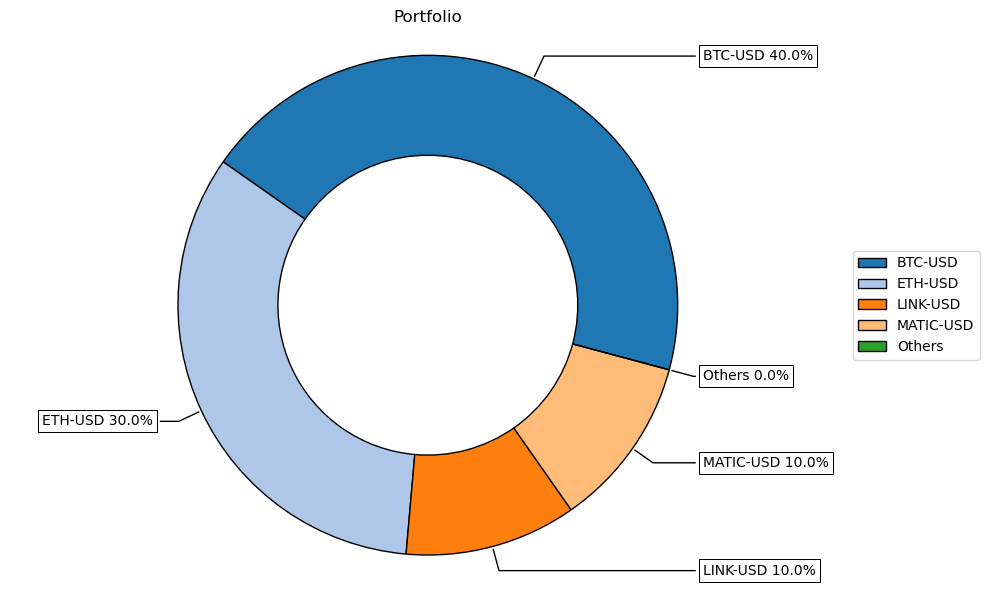

In [10]:
# Weight composition chart before
fig_2, ax_2 = plt.subplots(figsize=(6,2))

rp.plot_pie(w=pesos, title='Portfolio', height=6, width=10,
                 cmap="tab20", ax=None)
plt.savefig('pf_weights_in.png');

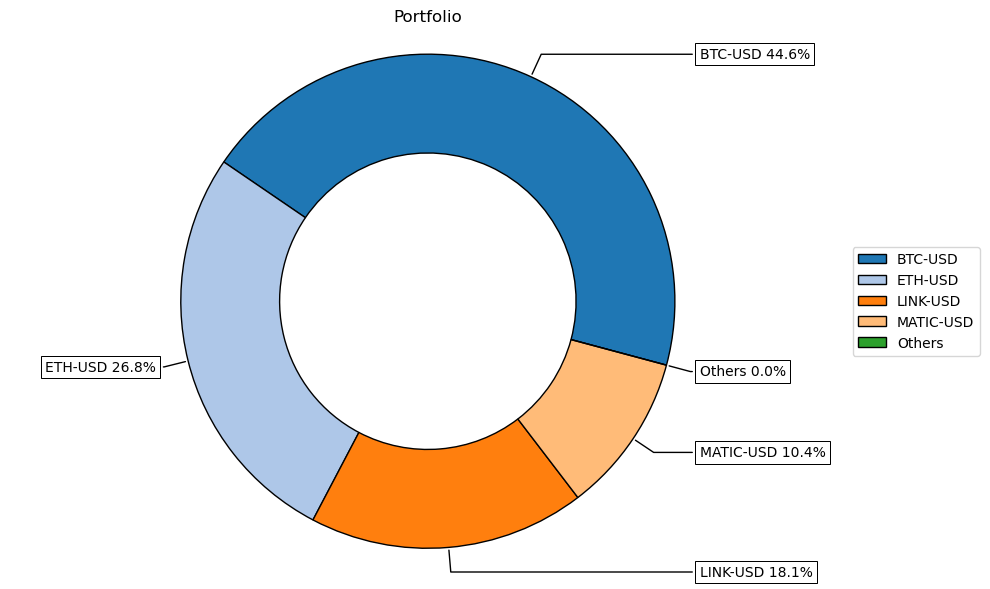

In [11]:
#Composition graph of the new weights of the optimized portfolio
fig_3, ax_3 = plt.subplots(figsize=(6,2))

rp.plot_pie(w=pesos_out, title='Portfolio', height=6, width=10,
                 cmap="tab20", ax=None)
plt.savefig('pf_weights_out.png');

In [12]:
# parameters to optimize your portfolio
media_retorno = portfolio.mu
covariancia = portfolio.cov
retornos = portfolio.returns

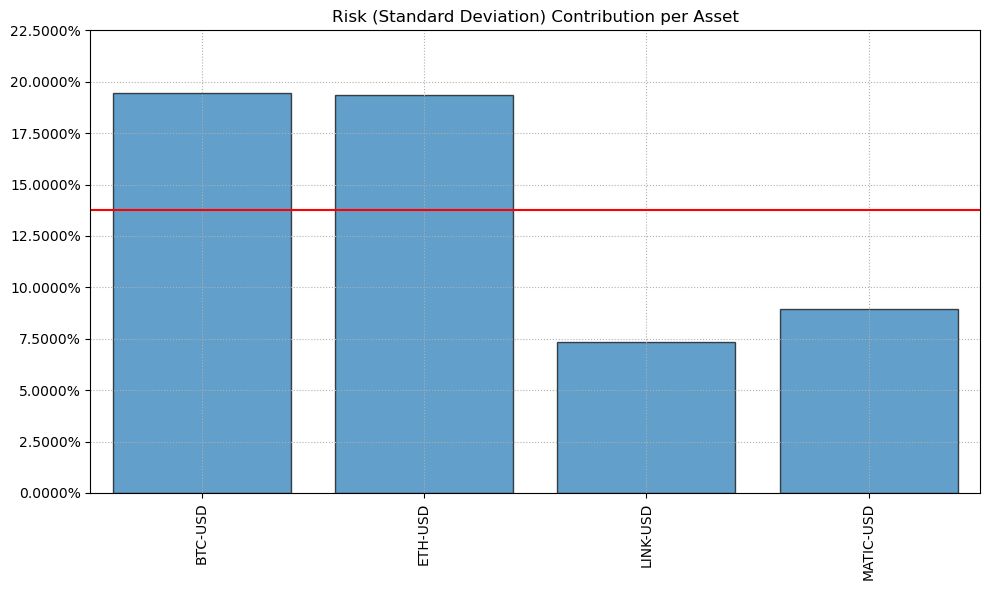

In [13]:
# # measure of risk per portfolio asset before
fig_4, ax_4 = plt.subplots(figsize=(6,2))

rp.plot_risk_con(w=pesos, cov=cov_in, returns=retorno_carteira, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)
plt.savefig('risk_cont_in.png');

In [14]:
cov_out

Ticker,BTC-USD,ETH-USD,LINK-USD,MATIC-USD
Ticker,,,,
BTC-USD,0.1120%,0.1168%,0.1261%,0.1403%
ETH-USD,0.1168%,0.1862%,0.1806%,0.2045%
LINK-USD,0.1261%,0.1806%,0.3068%,0.2539%
MATIC-USD,0.1403%,0.2045%,0.2539%,0.5312%


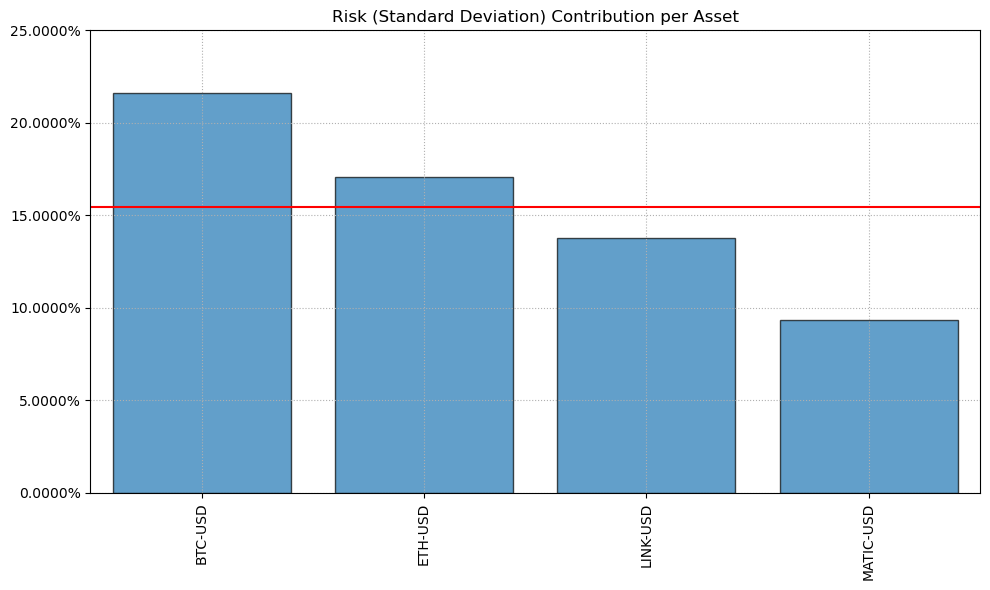

In [15]:
# risk measure per asset after optimization

fig_5, ax_5 = plt.subplots(figsize=(6,2))

rp.plot_risk_con(w=pesos_out, cov=cov_out, returns=retorno_out, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)
plt.savefig('risk_cont_out.png');

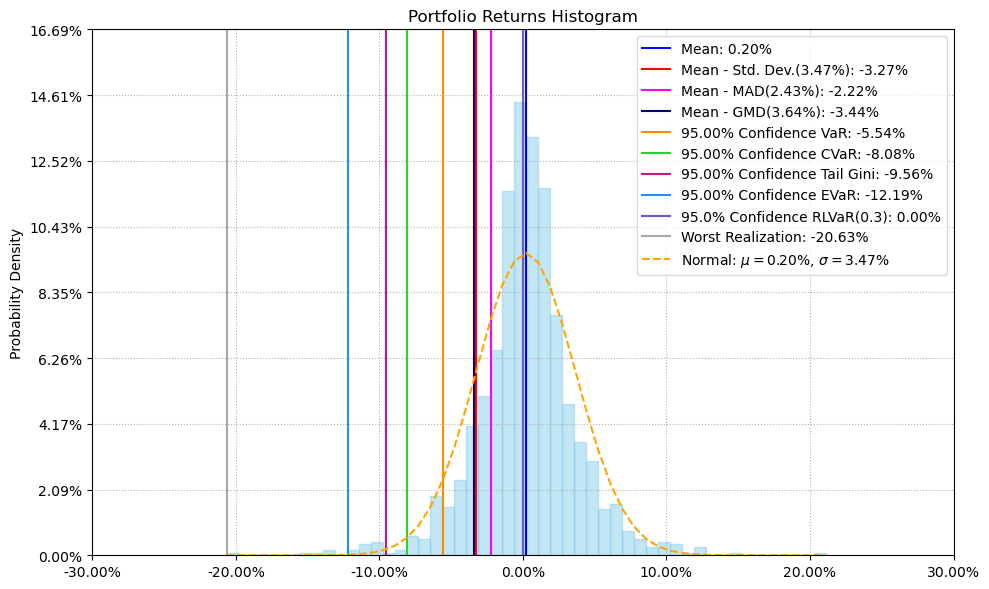

In [16]:
# Histogram of returns before optimization 
fig_6, ax_6 = plt.subplots()

rp.plot_hist(returns=retorno_carteira, w=pesos, alpha=0.05, bins=50, height=6,
                  width=10, ax=None)
plt.savefig('pf_returns_in.png');

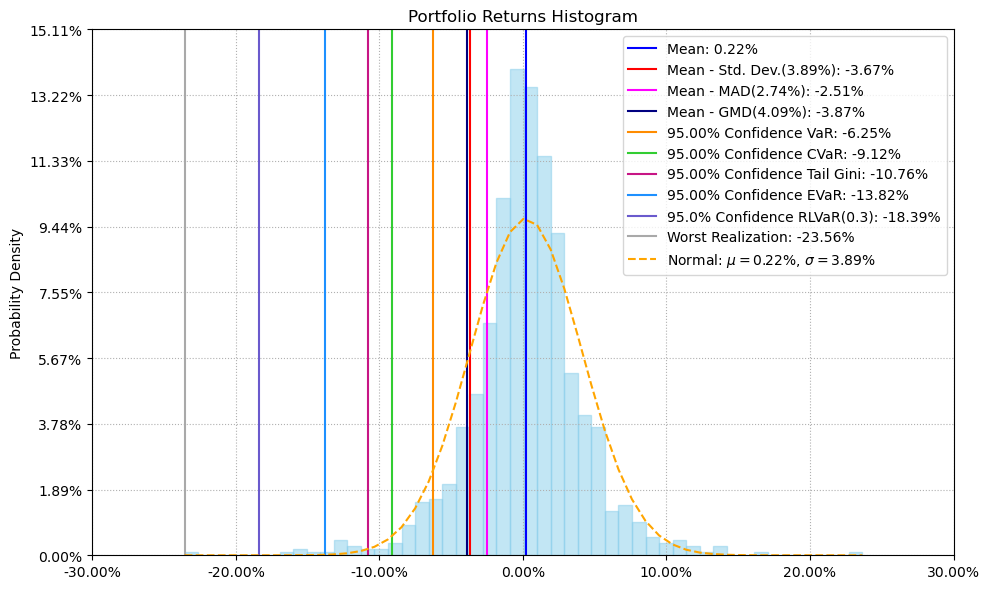

In [17]:
# Histogram of returns after optimization 
fig_7, ax_7 = plt.subplots()

rp.plot_hist(returns=retorno_out, w=pesos_out, alpha=0.05, bins=50, height=6,
                  width=10, ax=None);
plt.savefig('pf_returns_out.png')

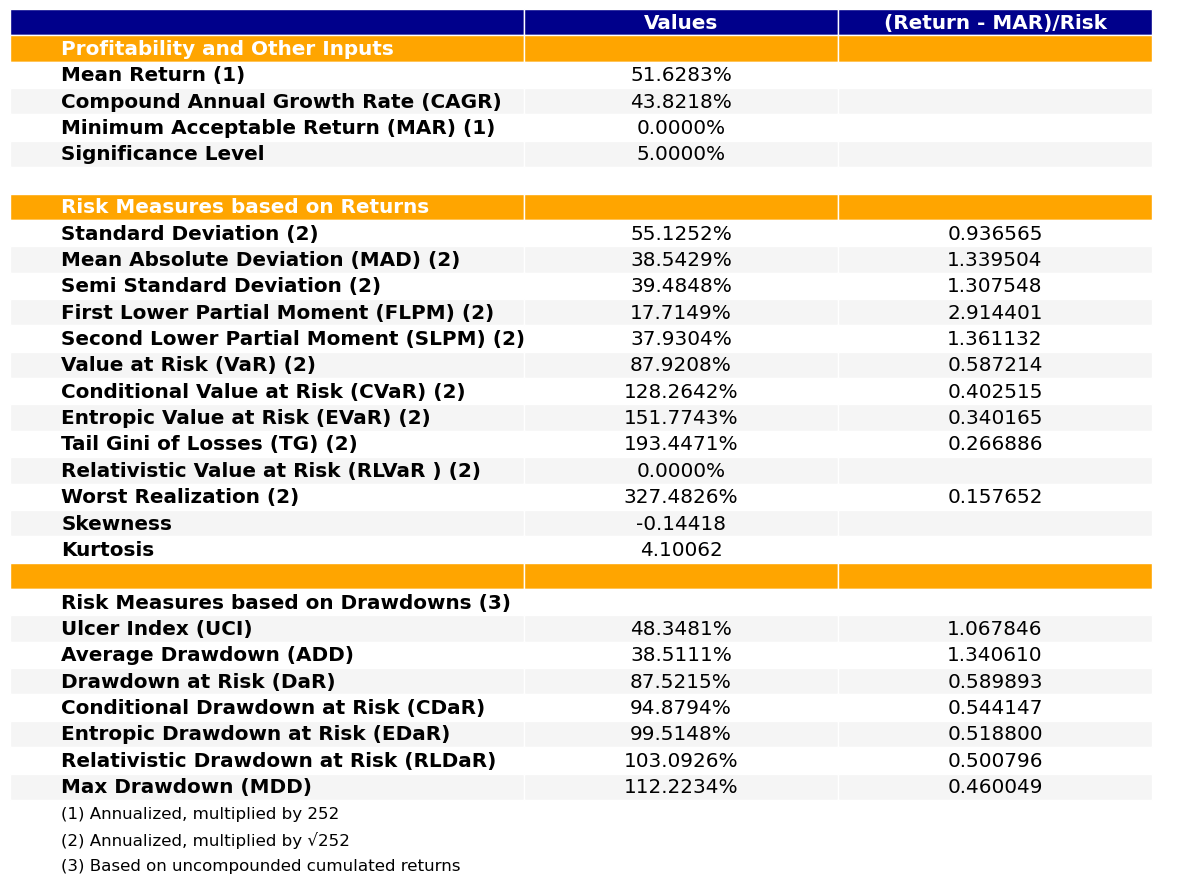

In [18]:
# Risk Measurement Table before optimization 
fig_8, ax_8 = plt.subplots(figsize=(6,2))
rp.plot_table(returns=retorno_carteira, w=pesos, MAR=0, alpha=0.05, ax=None)
plt.savefig('table_in.png');

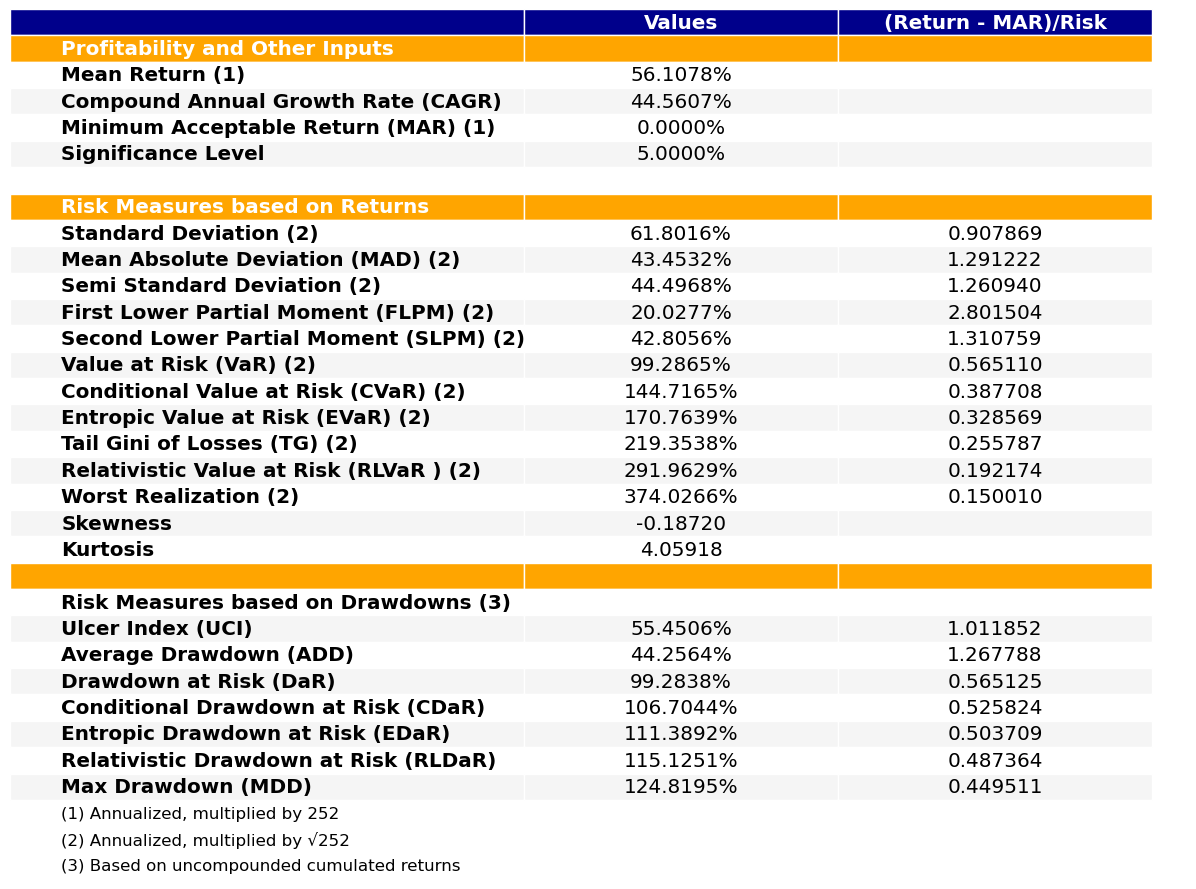

In [19]:
# Risk Measurement Table after optimization 
# Carteira out sample
fig_9, ax_9 = plt.subplots(figsize=(6,2))
rp.plot_table(returns=retorno_out, w=pesos_out, MAR=0, alpha=0.05, ax=None)
plt.savefig('table_out.png');

## turning into report

In [20]:
# Basic PDF setup

#Criamos o pdf
pdf = FPDF()

#Adicionamos uma nova página
pdf.add_page()

#Setup de fonte 
pdf.set_font('Arial', 'B', 16)

# 2. Layout do pdf

## Título
pdf.cell(40, 10, 'Diagnóstico da sua Carteira')

## Quebra de linha
pdf.ln(20)

# 3. Tabela performance
pdf.cell(20, 7, 'Como sua carteira performou de {} até {}'.format(inicio,fim))
pdf.ln(8)
pdf.image('table_in.png', w=180, h=200)
pdf.ln(60)

# 4. Tabela peformance out-of-sample
pdf.cell(20, 7, 'Como sua carteira performou de {} até {}'.format(out_inicio,out_fim))
pdf.ln(8)
pdf.image('table_out.png', w=180, h=200)
pdf.ln(60)

# 5. Retorno Acumulado Carteira
pdf.cell(20, 7, 'Retorno Acumulado da Carteira de {} até {}'.format(out_inicio,out_fim))
pdf.ln(8)
pdf.image('cum_ret.png', w=120, h=70)
pdf.ln(10)
         
# 6. Pesos         
pdf.cell(20, 7, 'Pesos Carteira Atual')
pdf.ln(8)
pdf.image('pf_weights_in.png', w=100, h=60)
pdf.ln(10)

pdf.cell(20, 7, 'Pesos Carteira Otimizada')
pdf.ln(8)
pdf.image('pf_weights_out.png', w=100, h=60)
pdf.ln(30)
        
# 7. Contribuição de risco por ativo
pdf.cell(20, 7, 'Contribuição de risco por ativo de {} até {}'.format(inicio,fim))
pdf.ln(15)
pdf.image('risk_cont_in.png',w=150, h=80)
pdf.ln(20)
pdf.cell(20, 7, 'Contribuição de risco por ativo de {} até {}'.format(out_inicio,out_fim))
pdf.ln(15)
pdf.image('risk_cont_out.png',w=150, h=80)
pdf.ln(80)         
  
# 8. Histograma de retornos
pdf.cell(20, 7, 'Histograma de retornos de {} até {}'.format(inicio,fim))
pdf.ln(15)
pdf.image('pf_returns_in.png', w=150, h=80)
pdf.ln(20)

pdf.cell(20, 7, 'Histograma de retornos de {} até {}'.format(out_inicio,out_fim))
pdf.ln(15)
pdf.image('pf_returns_out.png', w=150, h=80)
pdf.ln(20)       
         
# 9. Disclaimer
pdf.set_font('Times', '', 6)
pdf.cell(5, 2, 'Relatório construído com a biblioteca RiskFolio https://riskfolio-lib.readthedocs.io/en/latest/index.html')

# 10. Output do PDF file
pdf.output('diagnostico_de_carteira.pdf', 'F')

''